<a href="https://colab.research.google.com/github/Dynamic-Aryan/Personalized-Water-Intake-Recommendation-Based-On-Daily-Habits/blob/main/Personalized_Water_Intake_Recommendation_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Step 2: Create Synthetic Dataset
data = {
    'name': ['Amit', 'Neha', 'Raj', 'Sneha', 'Karan', 'Pooja', 'Anil', 'Riya', 'Soham', 'Divya'],
    'weight_kg': [60, 75, 55, 80, 70, 90, 85, 50, 65, 72],
    'activity_minutes': [30, 60, 15, 45, 50, 80, 70, 10, 40, 55],
    'temperature_celsius': [25, 30, 20, 28, 27, 35, 33, 22, 26, 29],
    'sleep_hours': [7, 6, 8, 5, 7, 6, 5, 9, 7, 6],
    'diet_type': ['vegetarian', 'non-veg', 'vegetarian', 'non-veg', 'non-veg',
                  'vegetarian', 'non-veg', 'vegetarian', 'vegetarian', 'non-veg'],
    'water_intake_liters': [2.1, 3.0, 1.8, 2.7, 2.8, 3.5, 3.2, 1.6, 2.3, 2.9]
}

df = pd.DataFrame(data)
print("Sample data:\n", df.head())

Sample data:
     name  weight_kg  activity_minutes  temperature_celsius  sleep_hours  \
0   Amit         60                30                   25            7   
1   Neha         75                60                   30            6   
2    Raj         55                15                   20            8   
3  Sneha         80                45                   28            5   
4  Karan         70                50                   27            7   

    diet_type  water_intake_liters  
0  vegetarian                  2.1  
1     non-veg                  3.0  
2  vegetarian                  1.8  
3     non-veg                  2.7  
4     non-veg                  2.8  


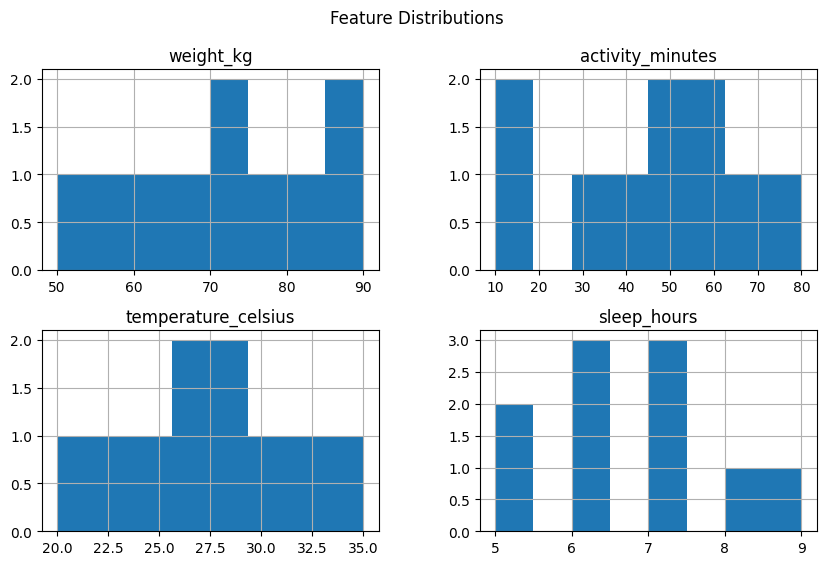

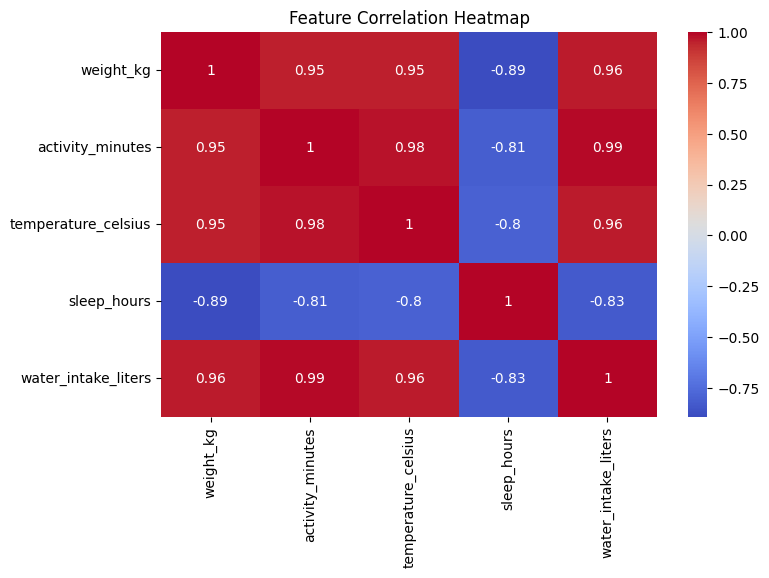

In [28]:
# Step 2.5: Data Visualization

# Histogram of features
df[['weight_kg', 'activity_minutes', 'temperature_celsius', 'sleep_hours']].hist(bins=8, figsize=(10,6))
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
# Step 3: Preprocess Data
df['diet_type_encoded'] = df['diet_type'].map({'vegetarian': 0, 'non-veg': 1})

X = df[['weight_kg', 'activity_minutes', 'temperature_celsius', 'sleep_hours', 'diet_type_encoded']]
y = df['water_intake_liters']
names = df['name']


In [30]:
# Step 5: Split dataset
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(
    X, y, names, test_size=0.2, random_state=42)

In [31]:
# Step 6: Train Models

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest Regressor (New model added)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Step 6: Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [33]:
# Step 7: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

--- Linear Regression Evaluation ---
MAE: 0.0510850596936836
MSE: 0.005037156305231669
R2 Score: 0.9588803566919863

--- Decision Tree Regressor Evaluation ---
MAE: 0.30000000000000004
MSE: 0.13
R2 Score: -0.06122448979591777

--- Random Forest Regressor Evaluation ---
MAE: 0.08349999999999902
MSE: 0.007434499999999878
R2 Score: 0.9393102040816337



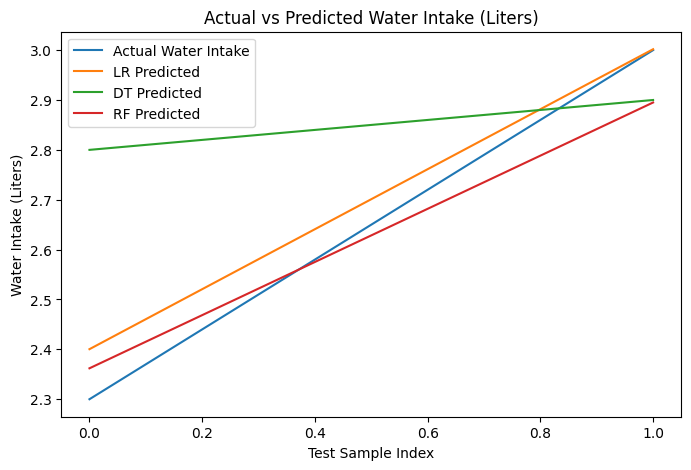

In [34]:
# Step 8: Visualize Predictions vs Actual
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Water Intake')
plt.plot(y_pred_lr, label='LR Predicted')
plt.plot(y_pred_dt, label='DT Predicted')
plt.plot(y_pred_rf, label='RF Predicted')
plt.legend()
plt.title("Actual vs Predicted Water Intake (Liters)")
plt.xlabel("Test Sample Index")
plt.ylabel("Water Intake (Liters)")
plt.show()


In [35]:
# Step 12: Actual vs Predicted values side by side print karna for each test sample

results = pd.DataFrame({
    'Name': names_test.values,
    'Actual Water Intake (liters)': y_test.values,
    'Linear Regression Prediction': y_pred_lr,
    'Decision Tree Prediction': y_pred_dt,
    'Random Forest Prediction': y_pred_rf
})

print("\nWater Intake Recommendation for Test Users:\n")

for i, row in results.iterrows():
    print(f"{row['Name']} should drink around {row['Linear Regression Prediction']:.2f} liters of water daily "
          f"(Actual intake: {row['Actual Water Intake (liters)']} liters)")


Water Intake Recommendation for Test Users:

Soham should drink around 2.40 liters of water daily (Actual intake: 2.3 liters)
Neha should drink around 3.00 liters of water daily (Actual intake: 3.0 liters)
